# Scoping
## Project Objectives:
- Complete a project to add to my portfolio
- Use Jupyter Notebook to communicate findings
- Run an analysis on a set of data
- Become familiar with data analysis workflow
  
### Goals
  -  What is the distribution of conservation status for animals?
  -  Are certain types of species more likely to be endangered?
  -  Are the differences between species and their conservation status significant?
  -  Which species were spotted the most at each park?

### Data
There are two datafiles. 
- The `species_info.csv` contains the different species: their category, scientific name, common name, and if it is protected or not.
- The `observations.csv`contains the observations made in four different national parks of the scientific names of the species.

### Analysis
We use descriptive statistics and data visualization to understand the data better. That said is Exploratory Data Analysis, EDA, and it is about finding out what is there, what patterns we can find, and what relationships exist.

The key metrics are:
- Distributions
- Counts
- Relationships between species
- Conservation status of species
- Observations of species in the national parks.

### Evaluation
Finally, we look at the results and see if it fulfills the goals stated, what has been learned and what limitations we had.

### Import the models 
needed to start the project. Later on in the project, additional modules will be imported.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Import the data files

In [2]:
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")


In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The file species_info.csv is imported as the DataFrame "species", and observations.csv as "observations".
   - `category` - class of animal
   - `scientific_name` - the scientific name of each species
   - `common_name` - the common names of each species
   - `conservation_status` - each species’ current conservation status

In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


   - `scientific_name` - the scientific name of each species
   - `park_name` - Park where species were found
   - `observations` - the number of times each species was observed at park

## Explore the data
Use common functions to explore the data files.

### Starting with `species`:
We see that there are 5824 different species in seven different categories, with four levels of protection.

The most abundant category is `Vascular Plant`, followed by `Bird`. The others are `Mammals`, `Reptile`, `Amphibian`, `Fish`, and `Nonvascular Plant`.

In [5]:
print(f"species shape: {species.shape}")
print(f"species columns: {species.columns}")
print(f"\nspecies description:\n{species.describe()}")
print(f"\nspecies count:\n{species.count()}")


species shape: (5824, 4)
species columns: Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

species description:
              category       scientific_name        common_names  \
count             5824                  5824                5824   
unique               7                  5541                5504   
top     Vascular Plant  Hypochaeris radicata  Brachythecium Moss   
freq              4470                     3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  

species count:
category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64


Categories in the species file:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

Amount of unique species: 5541

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64


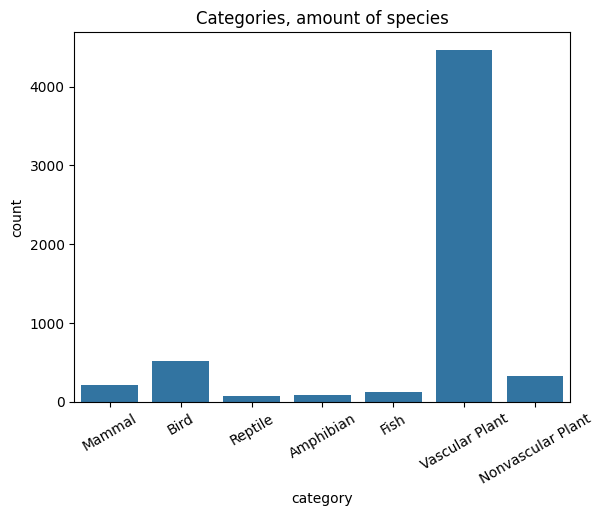

<Figure size 640x480 with 0 Axes>

In [6]:
print(f"Categories in the species file:\n{species["category"].unique()}")
print(f"\nAmount of unique species: {species.scientific_name.nunique()}")
print(f"\n{species.groupby("category").size().sort_values(ascending=False)}")

sns.countplot(x="category", data = species)
plt.title("Categories, amount of species")
plt.xticks(rotation = 30)
plt.show()
plt.clf()

### Next, we explore `observations`
There are 3314739 unique observations made in four national parks. The largest amount of observations are made in Yellowstone, followed by Yosemite, and then Bryce, Great Smokey Mountains National Park. Each species can be spotted several times and in one or more national parks.

In [7]:
print(f"observation shape: {observations.shape}")
print(f"observation columns: {observations.columns}")
print(f"\nobservation description:\n{observations.describe()}")
print(f"\nobservation count:\n{observations.count()}")

observation shape: (23296, 3)
observation columns: Index(['scientific_name', 'park_name', 'observations'], dtype='object')

observation description:
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000

observation count:
scientific_name    23296
park_name          23296
observations       23296
dtype: int64


park_name
Yellowstone National Park              1443562
Yosemite National Park                  863332
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Name: observations, dtype: int64

Total observations: 3314739

Each species observations in total: 
scientific_name
Abies bifolia           532
Abies concolor          630
Abies fraseri           518
Abietinella abietina    592
Abronia ammophila       523
Name: observations, dtype: int64


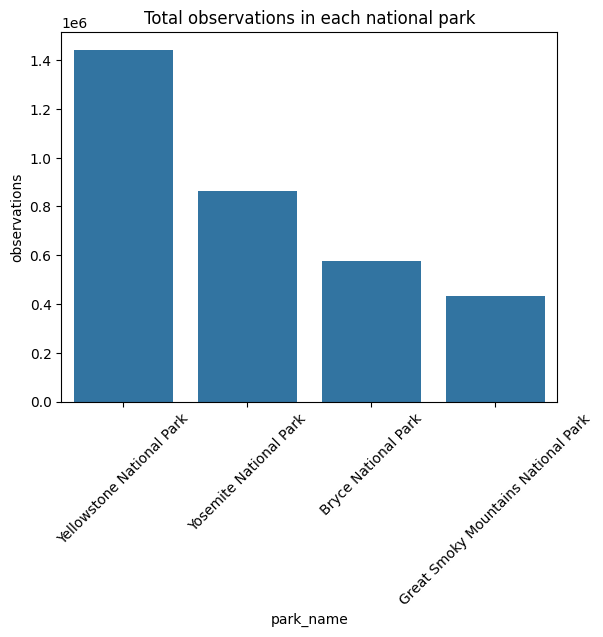

<Figure size 640x480 with 0 Axes>

In [8]:
nationalpark_count = observations.groupby('park_name')['observations'].sum().sort_values(ascending=False)
print(nationalpark_count)
print(f"\nTotal observations: " + str(nationalpark_count.sum()))

species_count = observations.groupby("scientific_name")["observations"].sum()
print(f"\nEach species observations in total: ")
print(species_count[0:5])

sns.barplot(nationalpark_count)
plt.title("Total observations in each national park")
plt.xticks(rotation = 45)
plt.show()
plt.clf()

## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`.

The column `conservation_status` has several possible values:

   - `Species of Concern`: declining or appear to be in need of conservation
   - `Threatened`: vulnerable to endangerment in the near future
   - `Endangered`: seriously at risk of extinction
   - `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range



In the exploration, a lot of `NaN` values were detected. These values will need to be converted to `No Intervention`. But at the same time, `No intervention`is vast larger than the other values.

In [9]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size().sort_values(ascending=False)

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
dtype: int64

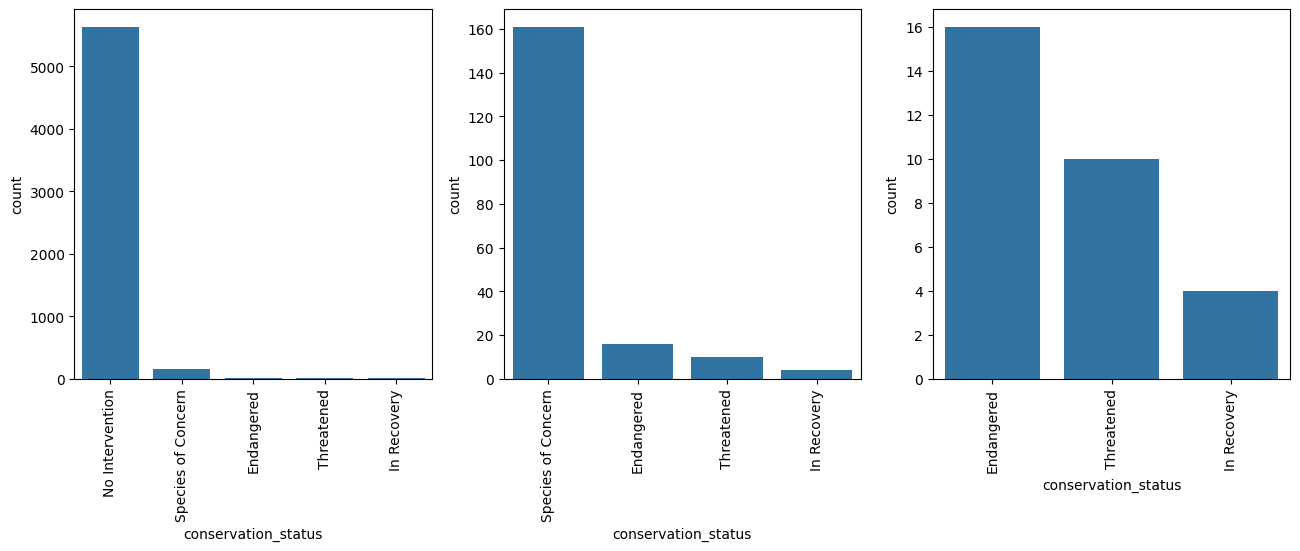

<function matplotlib.pyplot.clf() -> 'None'>

In [10]:
plt.subplot(1,3,1)
plt.subplots_adjust(left = -1)
sns.countplot(data=species, x="conservation_status")
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
plt.subplots_adjust(left = -1)
sns.countplot(data=species[species.conservation_status != "No Intervention"], x="conservation_status")
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
plt.subplots_adjust(left = -1)
sns.countplot(data=species[(species.conservation_status != "No Intervention") & (species.conservation_status != "Species of Concern")], x="conservation_status")
plt.xticks(rotation = 90)

plt.show()
plt.clf

We create a chart of the categories and conservation status. For `Birds` we have 3 In Recovery and 4 Endangered, and for `Mammals` we have only 1 In Recovery and 7 Endangered. Does that mean that the birds are recovering better than the mammals?

In [11]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


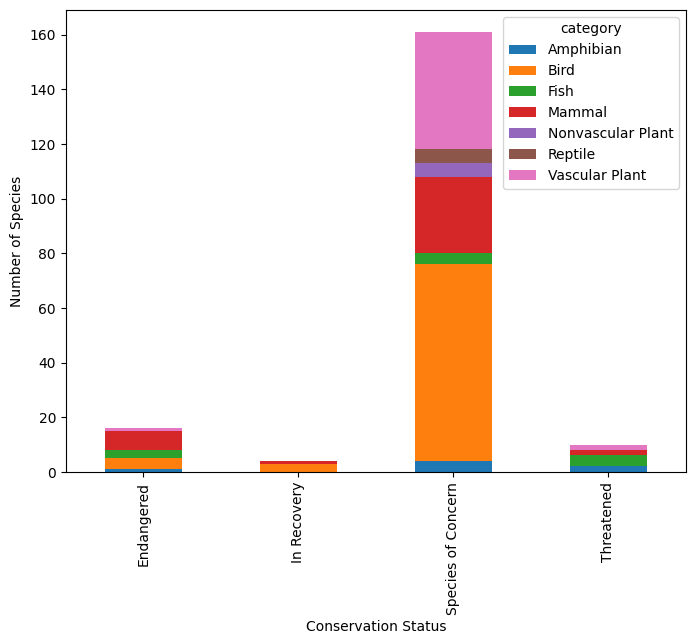

In [12]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

The same information as above but another kind of figure below

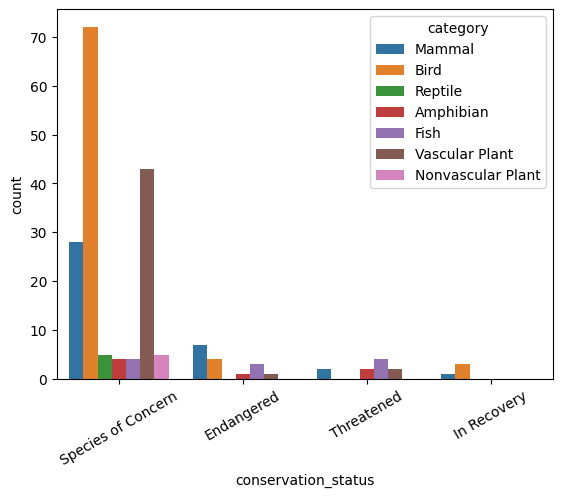

<Figure size 640x480 with 0 Axes>

In [13]:
sns.countplot(data=species[species.conservation_status != "No Intervention"], x="conservation_status", hue="category")
plt.xticks(rotation = 30)
plt.show()
plt.clf()

A figure only for Endangered catagory.

category
Mammal            7
Bird              4
Fish              3
Vascular Plant    1
Amphibian         1
Name: count, dtype: int64


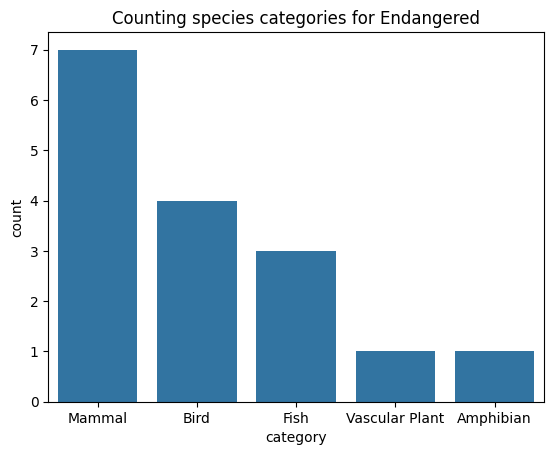

<Figure size 640x480 with 0 Axes>

In [14]:
species_endangered = species[species["conservation_status"] == "Endangered"]
print(species_endangered["category"].value_counts())
sns.countplot(x="category", data=species_endangered)
plt.title("Counting species categories for Endangered")
plt.show()
plt.clf()

Create a new column called `intervention`for all species not `No Intervention`, that means that this column contains all species that are `Endangered`, `Threatened`, In `Recovery` or `Species of Concern`.

In [15]:
species["protected"] = species["conservation_status"]!="No Intervention"

In [16]:
category_counts = species.groupby(["protected", "category"])\
                    .scientific_name.nunique().reset_index()\
                    .pivot(columns = "protected",
                           index="category",
                           values="scientific_name").reset_index()
category_counts.columns = (["category", "not_protected", "protected"])
category_counts


,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [17]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


We want to know if there is a relationship between (the categorical variables): the amount of protected mammals and the amount of protected birds. Therefor, we create a contingency table.

In [18]:
from scipy.stats import chi2_contingency

mammal_bird = {"category": ["mammal", "bird"],
                "not_protected": [146, 413],
                "protected": [30, 75]}
               
df_mammal_bird = pd.DataFrame(mammal_bird)
print(df_mammal_bird)
mammal_bird_contingency = [[146,30],[413,75]]

chi2, p, dof, expected = chi2_contingency(mammal_bird_contingency)
print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

  category  not_protected  protected
0   mammal            146         30
1     bird            413         75
Chi-squared: 0.16170148316545574
p-value: 0.6875948096661336
Degrees of freedom: 1
Expected frequencies:
[[148.1686747  27.8313253]
 [410.8313253  77.1686747]]


We get a p-value of 0.69, which is much higher than the threshold level of 0.05. That tells us that there is not a significant difference between the protection of birds and mammals.

Let's test the dependency for `reptile` and `mammal`.

In [19]:
reptile_mammal = {"category": ["reptile", "mammal"],
               "not_protected": [73, 146],
                "protected": [5, 30]}

df_reptile_mammal = pd.DataFrame(reptile_mammal)
print(df_reptile_mammal)
reptile_mammal_contingency = [[73,5],[146,30]]

chi2, p, dof, expected = chi2_contingency(reptile_mammal_contingency)
print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

  category  not_protected  protected
0  reptile             73          5
1   mammal            146         30
Chi-squared: 4.289183096203645
p-value: 0.03835559022969898
Degrees of freedom: 1
Expected frequencies:
[[ 67.2519685  10.7480315]
 [151.7480315  24.2519685]]


We got a p-value of 0.039, which is lower than the threshold of 0.05. That means that there is a statistically significant difference between the protection of reptiles and mammals.

In [20]:
print(species["category"].value_counts())
mammals=species[species["category"]=="Mammal"]
print(f"\nmammals: ")
print(mammals["category"].count())

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

mammals: 
214


In [21]:
endangered_mammals = species_endangered[species_endangered["category"] == "Mammal"]
print("Amount of endangered mammals:")
print(endangered_mammals["category"].count())

Amount of endangered mammals:
7


Percentage of species categories endangered: 
category
Amphibian            1.250000
Bird                 0.767754
Fish                 2.362205
Mammal               3.271028
Nonvascular Plant         NaN
Reptile                   NaN
Vascular Plant       0.022371
Name: count, dtype: float64


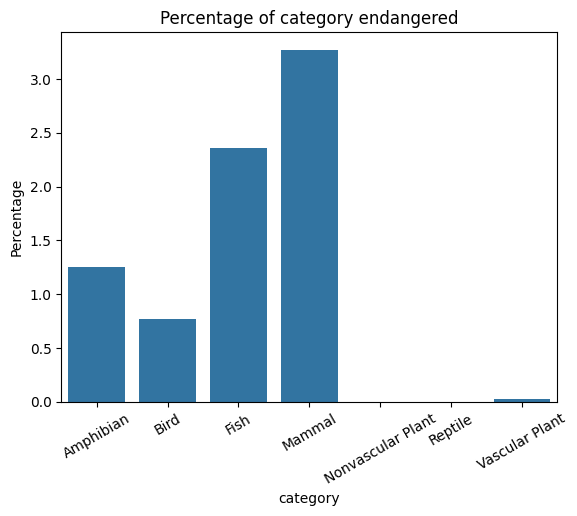

<Figure size 640x480 with 0 Axes>

In [22]:
print("Percentage of species categories endangered: ")
endangered_percentage=species_endangered["category"].value_counts()/species["category"].value_counts()*100
print(endangered_percentage)
sns.barplot(endangered_percentage)
plt.xticks(rotation = 30)
plt.title("Percentage of category endangered")
plt.ylabel("Percentage")
plt.show()
plt.clf()

Here we find out which species in every category that is most common in each national park.

In [23]:
print(observations["park_name"].unique())
print(observations["park_name"].unique()[0])

all_data = pd.merge(species, observations)
all_data.head()

grouped = all_data.groupby(['park_name', 'category', 'scientific_name'], as_index=False)['observations'].sum()
grouped = grouped.sort_values(by=['park_name', 'category', 'observations'], ascending=[True, True, False])
most_common_species = grouped.drop_duplicates(subset=['park_name', 'category'])
print(most_common_species[['park_name', 'category', 'scientific_name','observations']][:10])

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Great Smoky Mountains National Park
                                park_name           category  \
66                    Bryce National Park          Amphibian   
214                   Bryce National Park               Bird   
686                   Bryce National Park               Fish   
807                   Bryce National Park             Mammal   
917                   Bryce National Park  Nonvascular Plant   
1209                  Bryce National Park            Reptile   
3188                  Bryce National Park     Vascular Plant   
5607  Great Smoky Mountains National Park          Amphibian   
6048  Great Smoky Mountains National Park               Bird   
6227  Great Smoky Mountains National Park               Fish   

              scientific_name  observations  
66           Rana catesbeiana           324  
214             Columba livia          1017  
686  

Now we want to find the most common word in the `common_names` for `Birds`. First, we need to eliminate all punctuactions, i.e. `!"#$%&'()*+,-./:;<=>?@[\]^_```{|}~`. We use the module `string` (documentation at `https://docs.python.org/3/library/string.html`) 

In [24]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Bird"].common_names.apply(remove_punctuation).str.split().tolist()
common_Names[:5]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle']]

Next we remove duplicated words in each row. By creating a dictionary ("dict.fromkeys()") Python automatically removes duplicates, since ducplicates are not allowed in a dictionary.

In [25]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

cleanRows[:5]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle']]

Next step is to collapse the words into a single list. We use the module `itertools`and its function `chain`for this purpose.

In [26]:
from itertools import chain

names_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

names_list[:5]


['Brewsters', 'Warbler', 'Coopers', 'Hawk', 'Northern']

Count the words.

In [27]:
words_counted = []

for i in names_list:
    x = names_list.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
135,Warbler,59
226,Sparrow,29
166,American,21
447,Northern,20
259,Flycatcher,18
303,Common,18
367,Owl,18
21,Western,12
332,Woodpecker,12
451,Sandpiper,11


There are 59 species with the name Warbler in it. Find the warblers in the data

In [28]:
species['is_warbler'] = species.common_names.str.contains(r"\bWarbler\b", regex = True)

species[species.is_warbler].describe()

,category,scientific_name,common_names,conservation_status,protected,is_warbler
count,59,59,59,59,59,59
unique,1,59,39,3,2,1
top,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,No Intervention,False,True
freq,59,1,3,56,56,59


In [29]:
warbler_observations = observations.merge(species[species.is_warbler])
warbler_observations[:6]


,scientific_name,park_name,observations,category,common_names,conservation_status,protected,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,No Intervention,False,True
1,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,No Intervention,False,True
2,Helmitheros vermivorus,Yellowstone National Park,291,Bird,Worm-Eating Warbler,No Intervention,False,True
3,Limnothlypis swainsonii,Great Smoky Mountains National Park,56,Bird,Swainson's Warbler,No Intervention,False,True
4,Oreothlypis peregrina,Yellowstone National Park,250,Bird,Tennessee Warbler,No Intervention,False,True
5,Dendroica petechia,Bryce National Park,75,Bird,Yellow Warbler,No Intervention,False,True


In [30]:
warbler_observations.groupby("park_name").observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


Here we have the observations of warblers in each national park, counting the protected and the not protected species respectively.

In [31]:
obs_by_park = warbler_observations.groupby(['park_name', 'protected']).observations.sum().reset_index()
obs_by_park

,park_name,protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


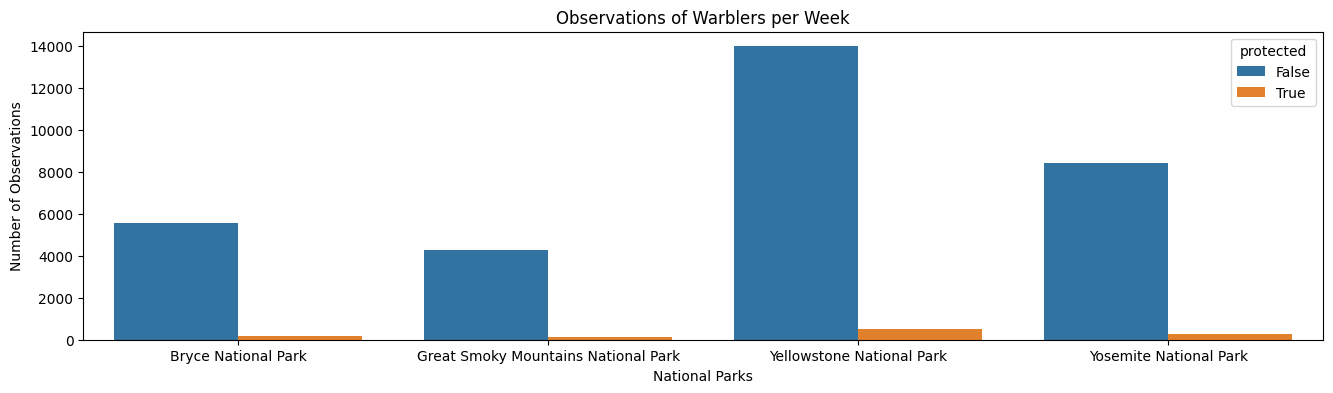

In [32]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warblers per Week')
plt.show()

## Conclusions
- What did you learn throughout the process?
- Are the results what you expected?
- What are the key findings and takeaways?

This project is part of Codecademy Data Science track, https://www.codecademy.com/paths/data-science-foundations/tracks/dscp-data-analysis-portfolio-project/modules/dscp-biodiversity-in-national-parks/kanban_projects/biodiversity-in-national-parks-portfolio-project . It it to use the newly learned skills in data handling and data exploration. 

I learn to use what I have learned, but most of all, to learn from others how they solved the problem. 

In this specific task, I didn't have any expectations on the results or findings. It was more of a practise of a skill.
